In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# LOAD THE DATA

In [2]:
file_path= r"C:\Users\tbozk\Documents\analistik_odevler\05L_Excel__TelcoCustomer.csv"
df= pd.read_csv(file_path, delimiter=';')

# BASIC INFORMATION ABOUT DATASET

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Let's make this automized and write the function 

In [4]:
def check_df(dataframe, head):
    print('------------Shape------------')
    print(dataframe.shape)
    print('------------Types------------')
    print(dataframe.dtypes)
    print('------------Head-------------')
    print(dataframe.head(head))
    print('------------Tail-------------')
    print(dataframe.tail(head))
    print('------------NA---------------')
    print(dataframe.isnull().sum())
    print('------------Quantiles--------')
    print(dataframe.describe([0,0.05,0.50,0.95,0.99,1]).T)
    
check_df(df,10)

------------Shape------------
(7043, 21)
------------Types------------
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
------------Head-------------
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No  

In [5]:
df.duplicated().sum() #It will show the number of duplicate values if they are present in the data.

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# ANALYSIS OF CATEGORICAL VARIABLES

## We identified categorical variables and assigned them as 'cat_cols' in the form of a list

In [20]:
cat_cols=[col for col in df.columns if (df[col].dtypes) in ['category', 'object','bool']]

## Now, let's define our new function that allows us to gain insights about the percentage distribution within those columns.

In [21]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame(
        {col_name: dataframe[col_name].value_counts(),
         'Ratio':100* dataframe[col_name].value_counts(1)}))
                             
    print('--------------------------')
    
 

In [10]:
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [11]:
for col in cat_cols:
    cat_summary(df,col)

            customerID     Ratio
7590-VHVEG           1  0.014198
3791-LGQCY           1  0.014198
6008-NAIXK           1  0.014198
5956-YHHRX           1  0.014198
5365-LLFYV           1  0.014198
...                ...       ...
9796-MVYXX           1  0.014198
2637-FKFSY           1  0.014198
1552-AAGRX           1  0.014198
4304-TSPVK           1  0.014198
3186-AJIEK           1  0.014198

[7043 rows x 2 columns]
--------------------------
        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435
--------------------------
     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328
--------------------------
     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824
--------------------------
     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374
--------------------------
                  MultipleLines      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 # ANALYSIS OF NUMERICAL VARIABLES

## We identified categorical variables and assigned them as 'other' in the form of a list

In [15]:
other=[col for col in df.columns if col not in cat_cols]
df[other]

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [18]:
#bilgilerle beraber grafik eklemek sitersen 
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame(
        {col_name: dataframe[col_name].value_counts(),
         'Ratio':100* dataframe[col_name].value_counts(1)}))
                             
    print('--------------------------')
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title(col_name)
        plt.show(block=True)

   SeniorCitizen      Ratio
0           5901  83.785319
1           1142  16.214681
--------------------------


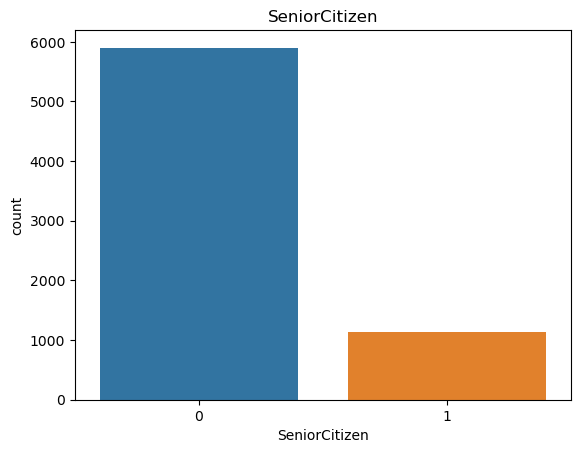

    tenure     Ratio
1      613  8.703677
72     362  5.139855
2      238  3.379242
3      200  2.839699
4      176  2.498935
..     ...       ...
28      57  0.809314
39      56  0.795116
44      51  0.724123
36      50  0.709925
0       11  0.156183

[73 rows x 2 columns]
--------------------------


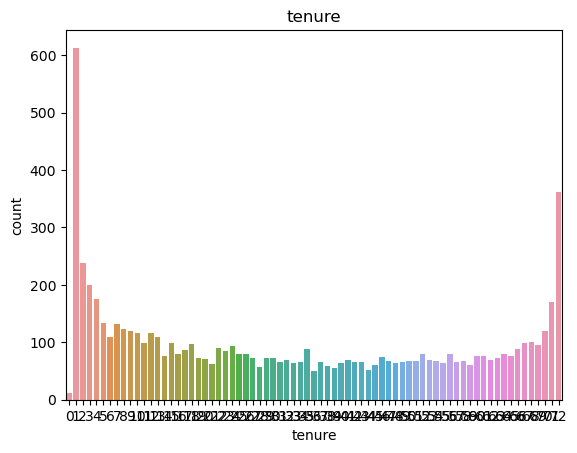

        MonthlyCharges     Ratio
20.05               61  0.866108
19.85               45  0.638932
19.95               44  0.624734
19.90               44  0.624734
20.00               43  0.610535
...                ...       ...
23.65                1  0.014198
114.70               1  0.014198
43.65                1  0.014198
87.80                1  0.014198
78.70                1  0.014198

[1585 rows x 2 columns]
--------------------------


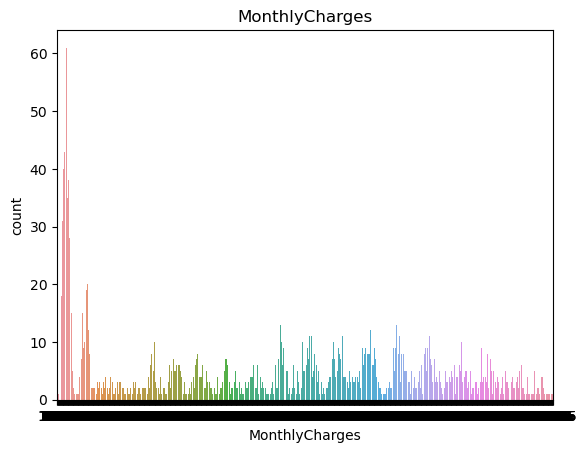

In [19]:
for col in other:
    cat_summary(df,col)

### Similarly, by iterating through columns with numerical data type, we are continuing our journey by defining a new function that calculates statistics such as mean, standard deviation, and the specified quantiles for these columns.

In [27]:
def num_summary(dataframe, numerical_col):
    quantiles = [0.05, 0.25, 0.50, 0.75, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

In [28]:
num_summary(df,other)

                 count       mean        std    min     5%   25%    50%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.00   0.0   0.00   
tenure          7043.0  32.371149  24.559481   0.00   1.00   9.0  29.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  19.65  35.5  70.35   

                  75%    95%      99%     max  
SeniorCitizen    0.00    1.0    1.000    1.00  
tenure          55.00   72.0   72.000   72.00  
MonthlyCharges  89.85  107.4  114.729  118.75  


In [45]:
def Tuba (dataframe, col):
    if dataframe[col].isnull().sum() > 0:
        if str(dataframe[col].dtypes) not in ['category', 'object','bool']:
            dataframe[col]=dataframe[col].fillna(dataframe[col].median())
        else: 
            dataframe[col]=dataframe[col].fillna(dataframe[col].mode()[0])
    else:
         print("There are no missing values in this dataset.")  

In [46]:
Tuba(df,'SeniorCitizen')

There are no missing values in this dataset.


# Churn

In [52]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [53]:
df['Churn'].value_counts(1)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

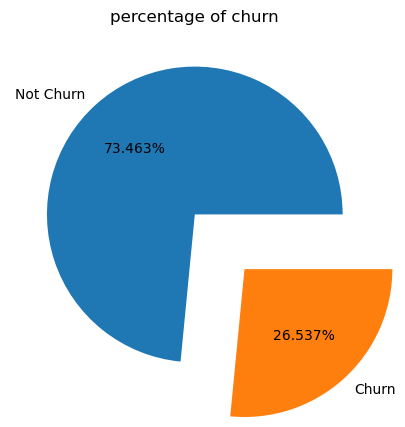

In [54]:
plt.pie(df["Churn"].value_counts().values , labels=["Not Churn", "Churn"], explode = [0,0.5], autopct="%.3f%%" )
plt.title('percentage of churn')
plt.show()

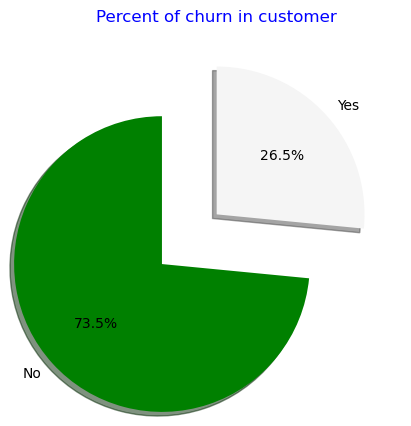

In [60]:

#Data to plot
labels = df["Churn"].value_counts().index
sizes = df["Churn"].value_counts()

colors = ["green", "whitesmoke"]
explode = (0.5,0) #explode 1st slice

plt.pie(sizes,explode,labels,autopct="%1.1f%%",colors=colors, shadow=True, startangle=90)
plt.title("Percent of churn in customer", color="blue")
plt.show()

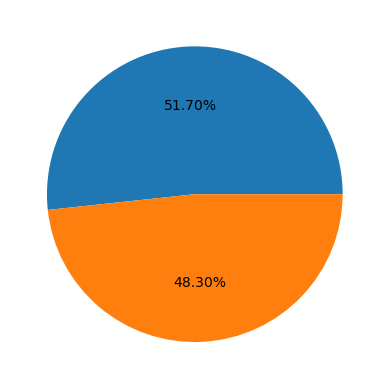

In [67]:
plt.pie(df['Partner'].value_counts().values,autopct="%.2f%%")
plt.show()

In [80]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [156]:
df.groupby(["Contract", "Churn","SeniorCitizen"])[['MonthlyCharges']].mean()

MonthlyCharges
Contract       Churn SeniorCitizen                
Month-to-month No    0                   58.199407
                     1                   77.992760
               Yes   0                   70.622611
                     1                   79.617347
One year       No    0                   59.873386
                     1                   81.262422
               Yes   0                   82.812044
                     1                   95.627586
Two year       No    0                   58.178979
                     1                   79.903957
               Yes   0                   86.432143
                     1                   89.191667

In [91]:
df.groupby(["Churn", 'Contract' ])[['MonthlyCharges']].mean()

MonthlyCharges
Churn Contract                      
No    Month-to-month       61.462635
      One year             62.508148
      Two year             60.012477
Yes   Month-to-month       73.019396
      One year             85.050904
      Two year             86.777083

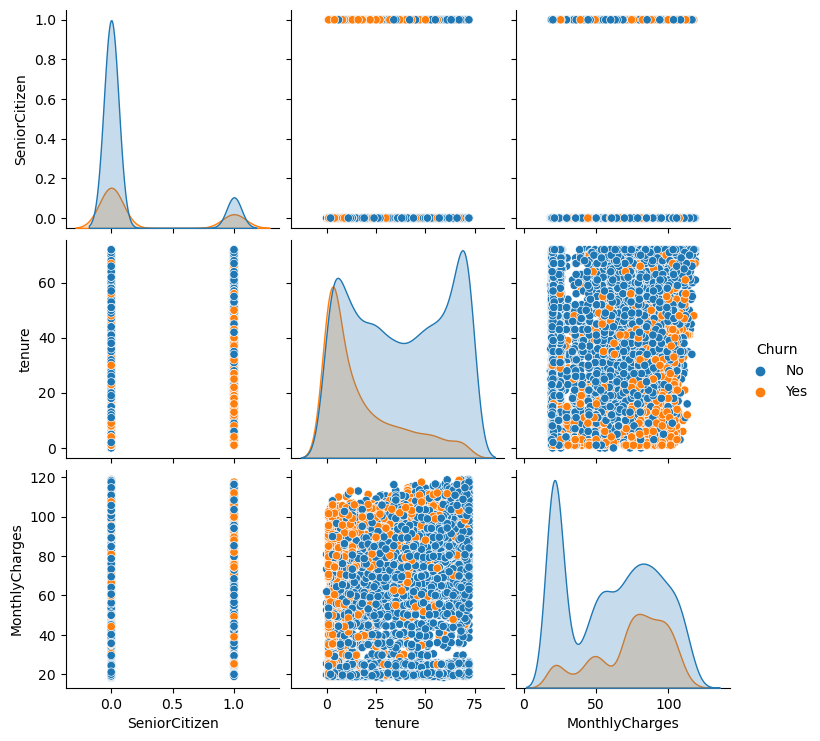

In [92]:
sns.pairplot(df, hue="Churn")

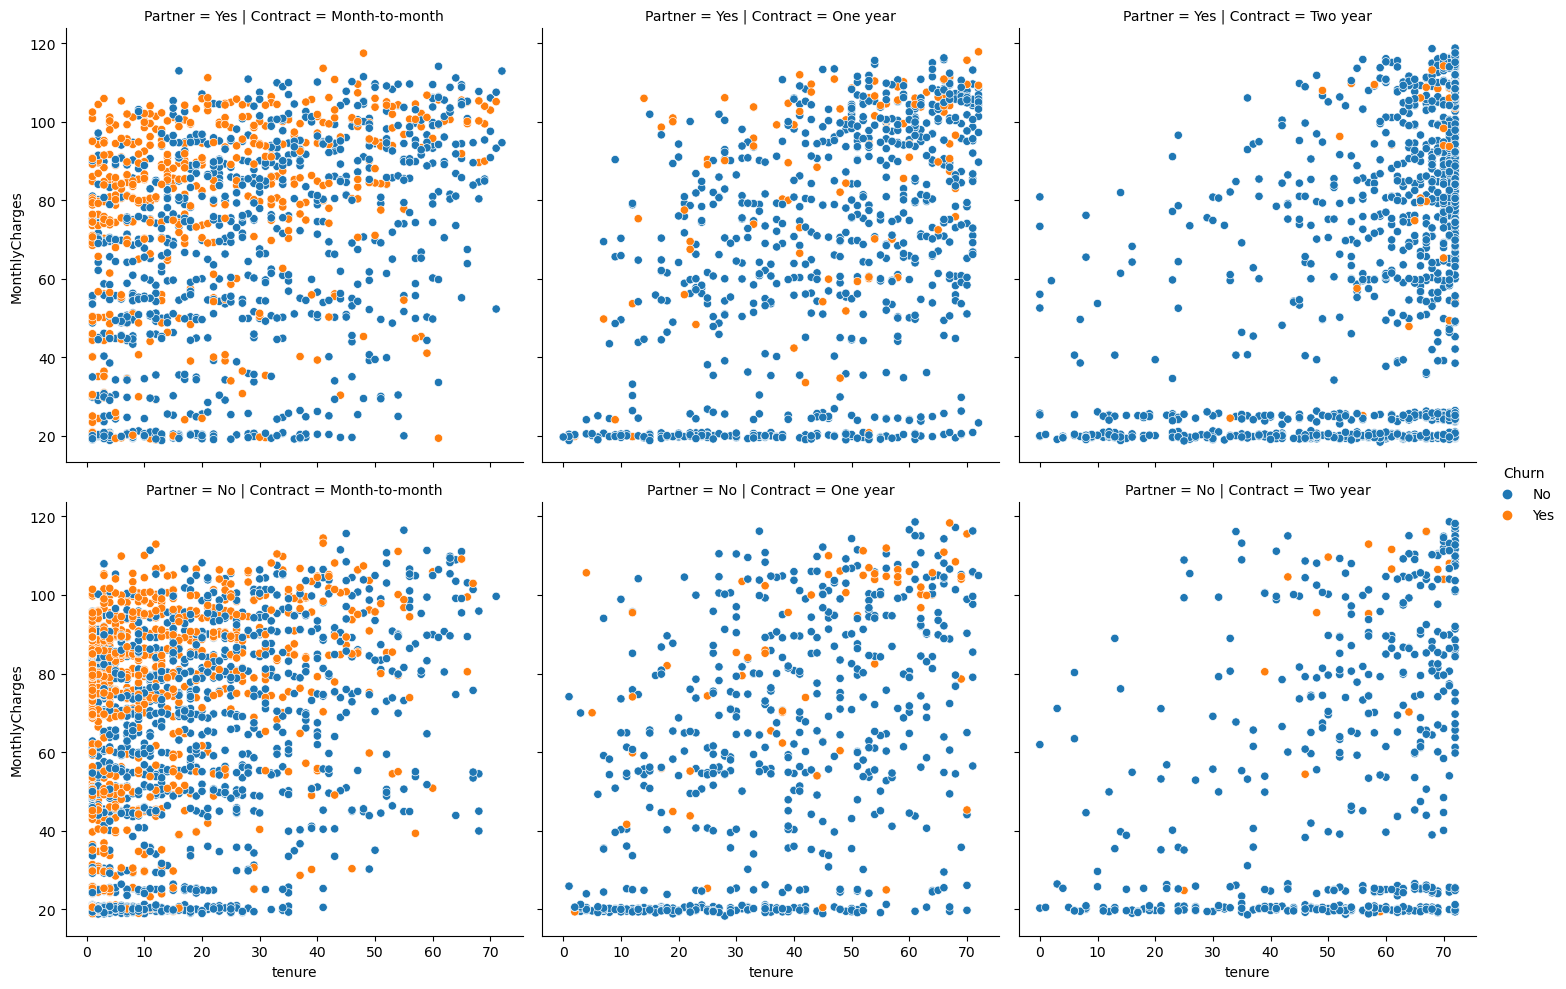

In [153]:
sns.relplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn", col="Contract", row="Partner");

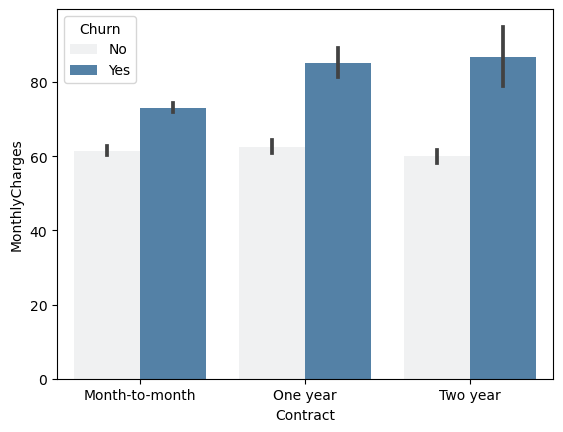

In [133]:
sns.barplot(x=df["Contract"], y=df["MonthlyCharges"], hue=df["Churn"], color='steelblue')

plt.show()



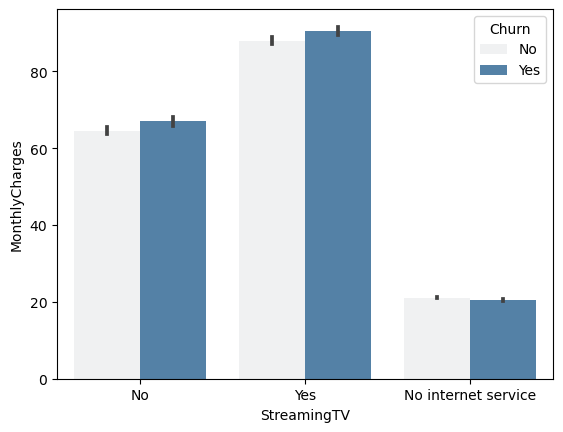

In [134]:
sns.barplot(x=df["StreamingTV"], y=df["MonthlyCharges"], hue=df["Churn"], color='steelblue')
plt.show()

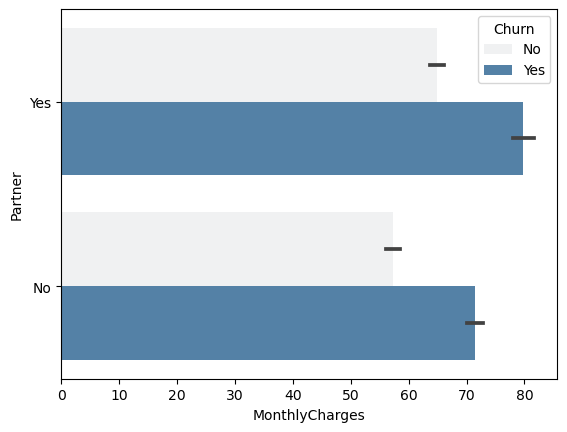

In [155]:
sns.barplot(x=df["MonthlyCharges"], y=df["Partner"], hue=df["Churn"], color='steelblue')

plt.show()


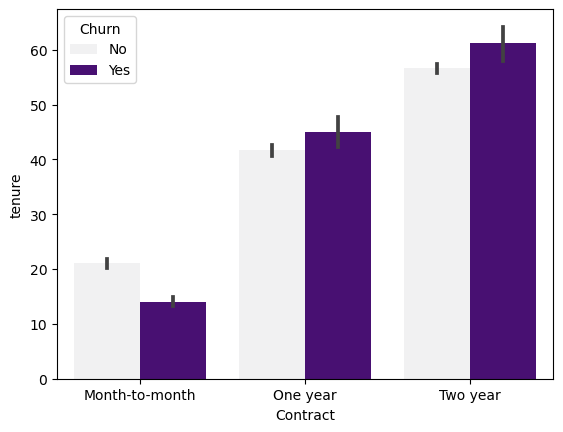

In [142]:
sns.barplot(x=df["Contract"], y=df["tenure"], hue=df["Churn"], color="indigo")
plt.show()

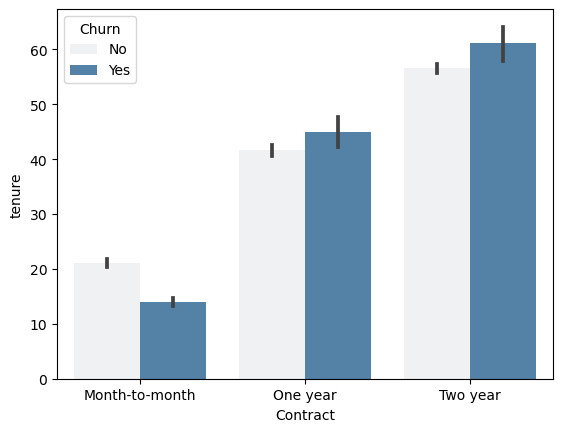

In [143]:
sns.barplot(x=df["Contract"], y=df["tenure"], hue=df["Churn"], color='steelblue')
plt.show()

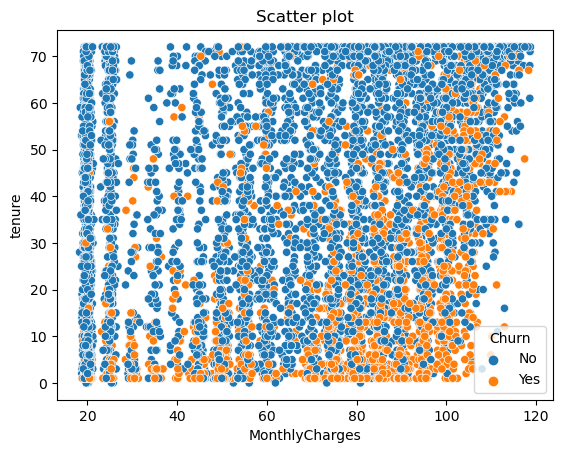

In [152]:
sns.scatterplot(data=df,
                x="MonthlyCharges",
                y="tenure",
                hue="Churn"
               )

plt.title("Scatter plot")
plt.show()

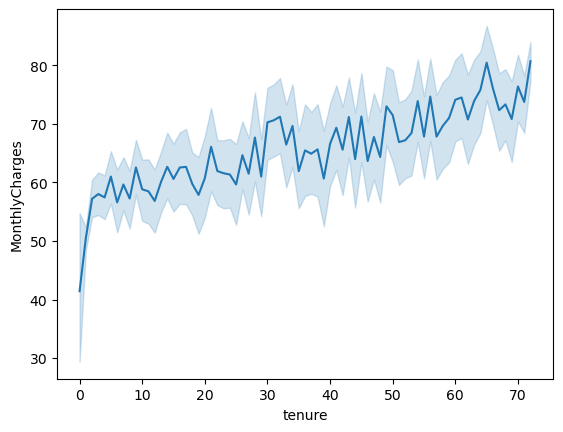

In [162]:
sns.lineplot(data=df, x="tenure", y="MonthlyCharges");

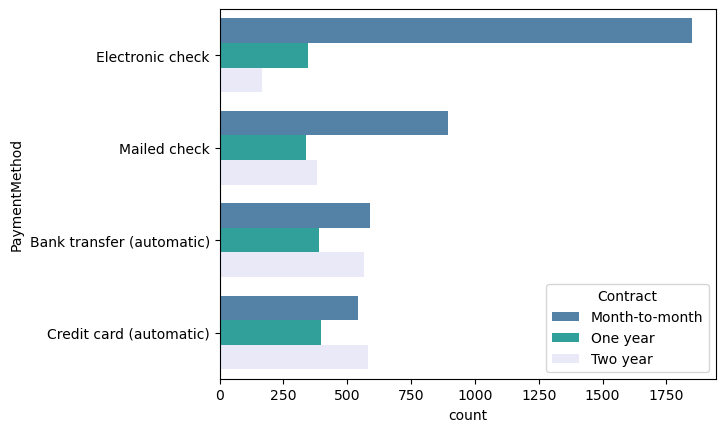

In [160]:
sns.countplot(y=df['PaymentMethod'], hue=df['Contract'], palette={"Month-to-month": "steelblue", "One year": "lightseagreen", "Two year": "lavender"})
plt.show()

In [157]:
df1= sns.load_dataset('car_crashes')

In [158]:
df1.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


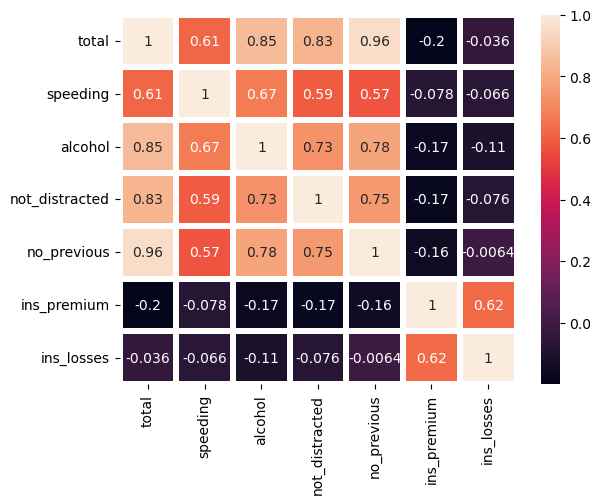

In [167]:
sns.heatmap(df1.corr(), annot= True, linewidths=3);
